In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
import tweets_utils
import importlib
from collections import Counter
%autosave 3600

Autosaving every 3600 seconds


# Indice
- [Bot - Conspiracy score - Community](#bcc)
- [Collecting data](#collecting)
- [Data studies](#dates)
- [Hashtags](#hashtags)
- [Process domain](#domain)

### Bot - Conspiracy score - Community
<a id="bcc" />

#### Bot - Community

In [41]:
path_degrees = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/rt_network/degree.json")[0]
path_louvain = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/rt_network/*louvain*.json")[0]
start_time = time.perf_counter()
file = open (path_degrees)
degree = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)
start_time = time.perf_counter()
file = open (path_louvain)
louvain = json.loads(file.read())
file.close()
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Time:  24.89344869999968
Time:  25.85161220000009


In [45]:
path_nt = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/rt_network/")[0]
# df_degree.to_csv(path_nt + "df_degree.csv", line_terminator="\n", index=False, encoding="utf-8")
# df_louvain.to_csv(path_nt + "df_louvian.csv", line_terminator="\n", index=False, encoding="utf-8")
df_degree = pd.read_csv(path_nt + "df_degree.csv", lineterminator="\n", low_memory=False)
df_louvian = pd.read_csv(path_nt + "df_louvian.csv", lineterminator="\n", low_memory=False)

#### Bot - Conspiracy score

In [2]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/csv/")[0]
bots = pd.read_csv(path + "bot_score.csv")
bots = bots.rename(columns={'user': 'user_screen_name'})
bots

,id,user_screen_name
0,1252818873578975232,matomecorona
1,1239490346691760128,Host24Space
2,1238684966063501313,CoronaVirusNFO
3,1203462567861084160,naija_reports
4,1245483551749005312,FR24NewsFrance
...,...,...
3867,1102793344785178625,MightyMousebb
3868,142018519,alej1477
3869,196110680,phen0480
3870,1175694002080886785,RemusJLupin2017


In [ ]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/")[0]
credibility_url = pd.read_csv(path + "sum_of_urls_df_all_months_with_score.csv")
bots_w_credibility = bots[["user_screen_name"]].merge(
    credibility_url[["number_of_urls", "conspiracy_score", "user_screen_name"]], on="user_screen_name", how="left")

In [3]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/large_files/")[0]
credibility_url = pd.read_csv(path + "sum_of_urls_df_all_months_with_score.csv")
bots_w_credibility = bots[["user_screen_name"]].merge(
    credibility_url[["number_of_urls", "conspiracy_score", "user_screen_name"]], on="user_screen_name", how="left")

In [36]:
bots_w_credibility = bots_w_credibility[bots_w_credibility["conspiracy_score"].notna()]
bots_w_credibility = bots_w_credibility[bots_w_credibility["number_of_urls"]>=10] 
bots_w_credibility = bots_w_credibility.reset_index(drop=True)
bots_w_credibility

,user_screen_name,number_of_urls,conspiracy_score
0,naija_reports,3249.0,0.50
1,RadioQuo,600.0,0.00
2,lehimesa,60.0,0.06
3,JavelinaBlue,35.0,0.08
4,uhiiman,585.0,0.00
...,...,...,...
1438,BelaBenanua,41.0,0.00
1439,u3Y4BDE,39.0,0.00
1440,cmerfy,42.0,0.07
1441,teachertwit2,24.0,0.20


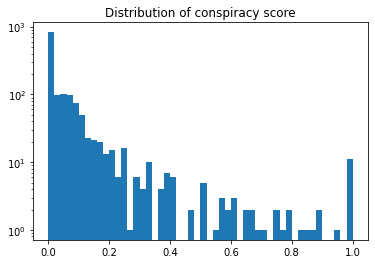

In [40]:
# # Plotting
plt.hist(bots_w_credibility["conspiracy_score"], 50)
plt.title("Distribution of conspiracy score")
plt.yscale('log', nonposy='clip')
plt.show()

### Collecting data
<a id="collecting"/>

In [14]:
cols_tweets = ["id", "created_at", "user_id", "user_screen_name", "text", "in_reply_to_status_id", 
               "in_reply_to_screen_name", "rt_created_at", "rt_in_reply_to_status_id", "rt_user_screen_name", 
               "quoted_status_id", "quoted_status_text", "quoted_status_created_at", "quoted_user_id", "hashtags",
               "urls", "media"]
df = pd.DataFrame()
result = []
# cols_tweets = [u'user_screen_name',u'user_id', u'created_at', 
#                u'urls', u"rt_created_at", u"rt_user_id", 
#                u"rt_user_screen_name", u'in_reply_to_user_id', 
#                u'in_reply_to_screen_name', u'in_reply_to_status_id']

files_tweets = glob.glob("F:/Supsi/COVID-19-Tweets/*/tweets.csv")

In [15]:
filename = files_tweets[4]
filename

'F:/Supsi/COVID-19-Tweets\\2020-05\\tweets.csv'

In [12]:
# for chunk in pd.read_csv(files_tweets[0], chunksize = 10, lineterminator="\n", low_memory=False):
#     break
# chunk.info()


In [16]:
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
# for filename in files_tweets:
print(f"Reading file: {filename}")
result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, bots["user_screen_name"]))
lista = result[j]
j = j + 1
print(f"Mese numero {j}")
for i in range(len(lista)):
    df = df.append(lista[i]["df"])
print(len(df))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

Reading file: F:/Supsi/COVID-19-Tweets\2020-05\tweets.csv
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
Processing chunk 10
Processing chunk 11
Processing chunk 12
Processing chunk 13
Processing chunk 14
Processing chunk 15
Processing chunk 16
Processing chunk 17
Processing chunk 18
Processing chunk 19
Processing chunk 20
Processing chunk 21
Processing chunk 22
Processing chunk 23
Processing chunk 24
Mese numero 1
278602
Time:  901.7043087


In [24]:
df.to_csv(path[0] + "bots_tweets.csv", line_terminator="\n", index=False, encoding="utf-8")

### Data studies
<a id="dates"/>

In [15]:
# fig = px.histogram(df, x="date")
# fig.update_layout(
#     title_text='Daily tweets', # title of plot
#     xaxis_title_text='Tweet', # xaxis label
#     yaxis_title_text='Count', # yaxis label
#     bargap=0.1, # gap between bars of adjacent location coordinates
#     bargroupgap=0.1 # gap between bars of the same location coordinates
# )
# fig.show()


### Hashtags
<a id="hashtags"/>

In [30]:
hashtag = tweets_utils.hashtag_process_list(list(df["hashtags"]))

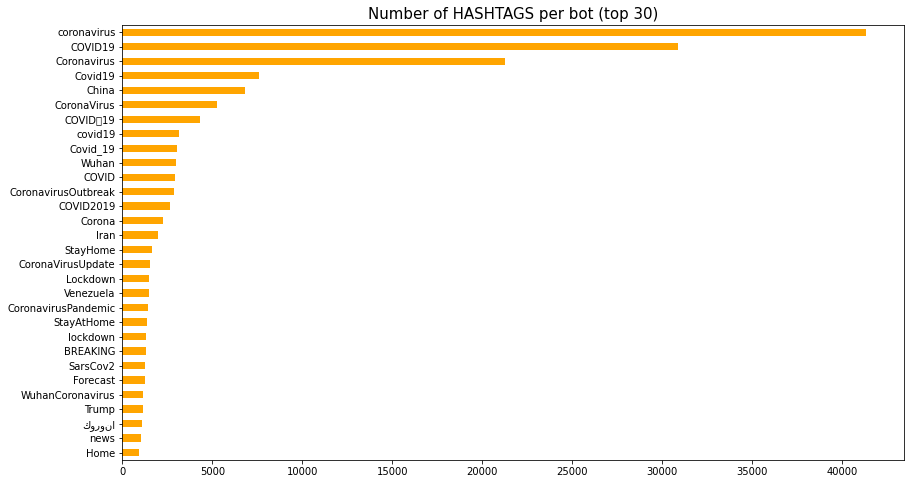

In [31]:
val = pd.Series(hashtag).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='orange', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of HASHTAGS per bot (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

### Process domain
<a id="domain"/>

In [33]:
urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in df["urls"]]
urls = list(filter(lambda num: num != "0", urls))
urls = tweets_utils.remove_www(urls)
# urls

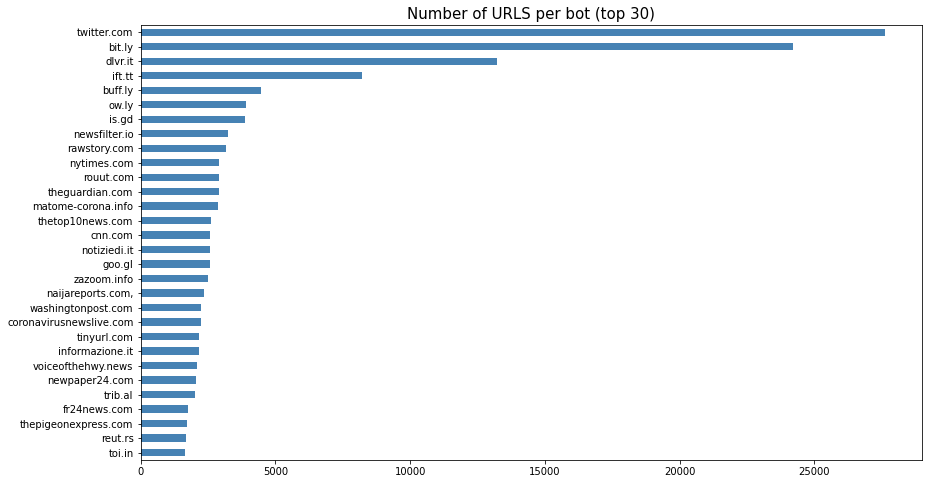

In [34]:
val = pd.Series(urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of URLS per bot (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()